The idea:

-Plot the synchrony for each population as a function of bg rate
-Same with firing rate and irregularity

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy as sp 
import time
import nest
import network
import os
import addons
import helpers
from network_params import net_dict
from sim_params import sim_dict
from stimulus_params import stim_dict



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.7.0
 Built: Apr 15 2024 07:21:32

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
min_bg = 4
max_bg = 18
step = 0.5

handles = ["L23E", "L23I", "L4E", "L4I", "L5E", "L5I", "L6E", "L6I"]
bar_labels = ['darkred', 'red', 'blue', 'aqua', 'green', 'lime', 'orange', 'moccasin']
path = "bg_"
data_sync = {}
data_irre = {}
data_firing = {}
data_std = {}
j = min_bg
for i in range(int((18-4)/0.5)):
    if int(j) == j:
        j = int(j)
    data_sync[i] = np.loadtxt(path + str(j)+"/synchrony.dat")
    data_irre[i] = np.loadtxt(path + str(j)+"/irregularity.dat")
    data_firing[i] = np.loadtxt(path + str(j)+"/mean_rate.dat")
    data_std[i] = np.loadtxt(path + str(j)+"/std_rate.dat")
    j = j + 0.5

bg_rate = np.linspace(4,18,28)

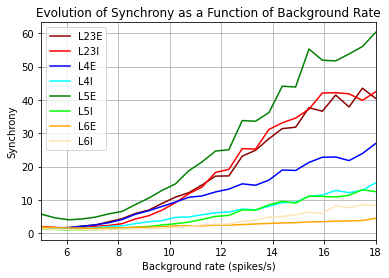

In [3]:
pops_sync = np.zeros((8,28))
j=0
for i in data_sync:
    pops_sync[:,j] = data_sync[i]
    j= j +1
for pop in range(0,8):
    plt.plot(bg_rate,pops_sync[pop],label = str(pop),color=bar_labels[pop])
plt.xlabel("Background rate (spikes/s)")
plt.ylabel("Synchrony")
plt.xlim(5,18)
plt.legend(labels=handles)
plt.title("Evolution of Synchrony as a Function of Background Rate")
plt.grid()

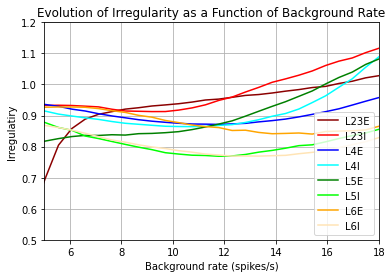

In [4]:
pops_irre = np.zeros((8,28))
j=0
for i in data_irre:
    pops_irre[:,j] = data_irre[i]
    j= j +1
for pop in range(0,8):
    plt.plot(bg_rate,pops_irre[pop],label = str(pop),color=bar_labels[pop])
plt.xlabel("Background rate (spikes/s)")
plt.ylabel("Irregulatiry")
plt.legend()
plt.xlim(5,18)
plt.ylim(0.5,1.2)
plt.legend(labels=handles)
plt.title("Evolution of Irregularity as a Function of Background Rate")
plt.grid()

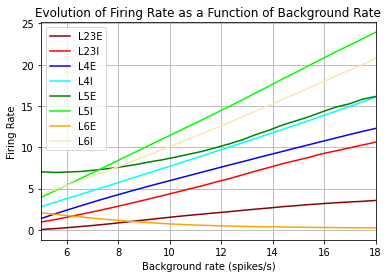

In [5]:
pops_rate = np.zeros((8,28))
pops_std = np.zeros((8,28))
j=0
for i in data_firing:
    pops_rate[:,j] = data_firing[i]
    pops_std[:,j] = data_std[i]
    j= j +1
for pop in range(0,8):
    #plt.errorbar(bg_rate,pops_rate[pop],yerr=pops_std[pop],label = str(pop))
    plt.plot(bg_rate,pops_rate[pop],label = str(pop),color=bar_labels[pop])
plt.xlabel("Background rate (spikes/s)")
plt.ylabel("Firing Rate")
plt.xlim(5,18)
plt.legend(labels=handles)
plt.title("Evolution of Firing Rate as a Function of Background Rate")
plt.grid()